<a href="https://colab.research.google.com/github/kiyong21c/pandas_class/blob/master/%EC%98%A4%EB%8A%98%EC%BD%94%EB%93%9C%EA%B0%95%EC%9D%98_%EA%B5%AD%EA%B0%80%ED%86%B5%EA%B3%84%ED%8F%AC%ED%84%B8(KOSIS)_%EC%86%8C%EB%B9%84%EC%9E%90%EB%AC%BC%EA%B0%80%EC%A7%80%EC%88%98%EB%B3%80%EB%8F%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 도구

In [19]:
#  ⚙️ 시각화를 위한 글꼴 설정

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
    # Linux
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [42]:
filename = '/content/drive/MyDrive/Colab Notebooks/품목별 소비자물가지수(2015년 기준=100).csv'
df_price_index = pd.read_csv(filename, encoding="cp949")
df_price_index.shape

,시도별,품목별,시점,데이터
0,전국,총지수,2019. 09,105.20
1,전국,총지수,2019. 10,105.46
2,전국,총지수,2019. 11,104.87
3,전국,총지수,2019. 12,105.12
4,전국,총지수,2020. 01,105.79
...,...,...,...,...
12145,전국,장례비,2021. 05,107.73
12146,전국,장례비,2021. 06,108.15
12147,전국,장례비,2021. 07,108.21
12148,전국,장례비,2021. 08,108.26


(12150, 4)

In [44]:
df_price_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12150 entries, 0 to 12149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도별     12150 non-null  object 
 1   품목별     12150 non-null  object 
 2   시점      12150 non-null  object 
 3   데이터     12150 non-null  float64
dtypes: float64(1), object(3)
memory usage: 379.8+ KB


In [52]:
df_price_index.head(5)


,시도별,품목별,시점,데이터
0,전국,총지수,2019. 09,105.20
1,전국,총지수,2019. 10,105.46
2,전국,총지수,2019. 11,104.87
3,전국,총지수,2019. 12,105.12
4,전국,총지수,2020. 01,105.79


In [53]:
df_price_index['품목별'] == "총지수" # 품목별 컬럼중에 총지수 만 True False

0         True
1         True
2         True
3         True
4         True
         ...  
12145    False
12146    False
12147    False
12148    False
12149    False
Name: 품목별, Length: 12150, dtype: bool

In [56]:
df_price_index[df_price_index['품목별'] == "총지수"] # 품목별별 컬럼중에에 총지수만 Filtering

,시도별,품목별,시점,데이터
0,전국,총지수,2019. 09,105.20
1,전국,총지수,2019. 10,105.46
2,전국,총지수,2019. 11,104.87
3,전국,총지수,2019. 12,105.12
4,전국,총지수,2020. 01,105.79
5,전국,총지수,2020. 02,105.80
6,전국,총지수,2020. 03,105.54
7,전국,총지수,2020. 04,104.95
8,전국,총지수,2020. 05,104.71
9,전국,총지수,2020. 06,104.87


In [57]:
df_price = df_price_index[df_price_index['품목별'] == "총지수"].copy() # 새로운 변수로 설정해 줄때 .copy()이용해서 깊은 복사 해줌
df_price

,시도별,품목별,시점,데이터
0,전국,총지수,2019. 09,105.20
1,전국,총지수,2019. 10,105.46
2,전국,총지수,2019. 11,104.87
3,전국,총지수,2019. 12,105.12
4,전국,총지수,2020. 01,105.79
5,전국,총지수,2020. 02,105.80
6,전국,총지수,2020. 03,105.54
7,전국,총지수,2020. 04,104.95
8,전국,총지수,2020. 05,104.71
9,전국,총지수,2020. 06,104.87


In [61]:
df_price['데이터'].pct_change(periods=12) * 100 # 12개 전의 데이터와 각각을 비율로 나타냄(전년도 동월대)
df_price['전년동월대비'] = df_price['데이터'].pct_change(periods=12) * 100 # 새로운 컬럼으로 생성

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
df_price

,시도별,품목별,시점,데이터,전년동월대비
0,전국,총지수,2019. 09,105.20,NaN
1,전국,총지수,2019. 10,105.46,NaN
2,전국,총지수,2019. 11,104.87,NaN
3,전국,총지수,2019. 12,105.12,NaN
4,전국,총지수,2020. 01,105.79,NaN
5,전국,총지수,2020. 02,105.80,NaN
6,전국,총지수,2020. 03,105.54,NaN
7,전국,총지수,2020. 04,104.95,NaN
8,전국,총지수,2020. 05,104.71,NaN
9,전국,총지수,2020. 06,104.87,NaN


In [64]:
df_price_notnan = df_price.dropna()
df_price_notnan # 데이터 수정이있을때 새로운 변수를 사용하자

,시도별,품목별,시점,데이터,전년동월대비
12,전국,총지수,2020. 09,106.20,0.950570
13,전국,총지수,2020. 10,105.61,0.142234
14,전국,총지수,2020. 11,105.50,0.600744
15,전국,총지수,2020. 12,105.67,0.523212
16,전국,총지수,2021. 01,106.47,0.642783
17,전국,총지수,2021. 02,107.00,1.134216
18,전국,총지수,2021. 03,107.16,1.534963
19,전국,총지수,2021. 04,107.39,2.324917
20,전국,총지수,2021. 05,107.46,2.626301
21,전국,총지수,2021. 06,107.39,2.402975


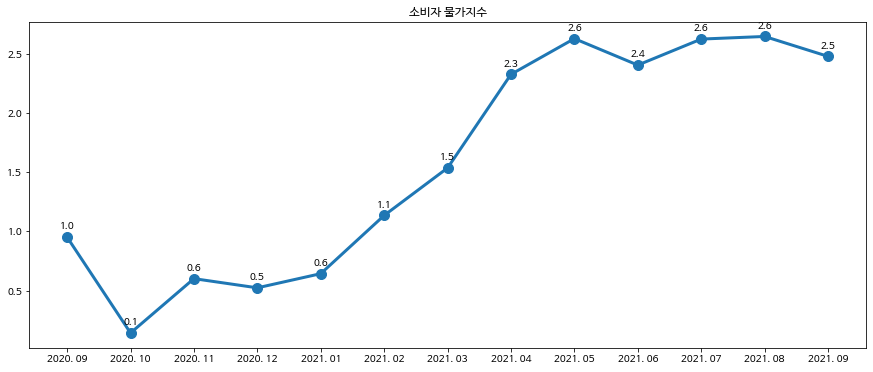

In [90]:
fig = plt.figure(figsize=(15, 6)) # 캔버스 생성
ax = fig.add_subplot()  # 서브플롯 생성
line_plot = ax.plot(df_price_notnan['시점'],
                    df_price_notnan['전년동월대비'],
                    marker='o',
                    ms=10,
                    linewidth=3)
# 선그래프 요소
line_plot = line_plot[0]
for price_index in list(line_plot.get_xydata()): # get_xydata()유용함
  ax.text(x=price_index[0], y=price_index[1]+0.07, s=f"{price_index[1]:.1f}", ha='center')
plt.title('소비자 물가지수')
plt.show()

In [79]:
line_plot[0].get_xydata()

array([[ 0.        ,  0.95057034],
       [ 1.        ,  0.14223402],
       [ 2.        ,  0.60074378],
       [ 3.        ,  0.52321157],
       [ 4.        ,  0.64278287],
       [ 5.        ,  1.1342155 ],
       [ 6.        ,  1.53496305],
       [ 7.        ,  2.32491663],
       [ 8.        ,  2.62630121],
       [ 9.        ,  2.40297511],
       [10.        ,  2.62254434],
       [11.        ,  2.64454976],
       [12.        ,  2.47645951]])

In [96]:
df_import = df_price_index[df_price_index['품목별'].isin(['달걀','상추','마늘','돼지고기','라면','경유','휘발유','전세'])].copy()
df_import

,시도별,품목별,시점,데이터
300,전국,상추,2019. 09,162.73
301,전국,상추,2019. 10,192.68
302,전국,상추,2019. 11,138.66
303,전국,상추,2019. 12,122.68
304,전국,상추,2020. 01,156.18
...,...,...,...,...
8245,전국,전세,2021. 05,109.94
8246,전국,전세,2021. 06,110.09
8247,전국,전세,2021. 07,110.31
8248,전국,전세,2021. 08,110.59


In [102]:
df_import['전월동월대비비']=df_import.sort_values(by='시점').groupby('품목별')['데이터'].pct_change(periods=12) * 100

In [104]:

df_import

,시도별,품목별,시점,데이터,전월동월대비비
300,전국,상추,2019. 09,162.73,NaN
301,전국,상추,2019. 10,192.68,NaN
302,전국,상추,2019. 11,138.66,NaN
303,전국,상추,2019. 12,122.68,NaN
304,전국,상추,2020. 01,156.18,NaN
...,...,...,...,...,...
8245,전국,전세,2021. 05,109.94,1.768027
8246,전국,전세,2021. 06,110.09,1.850310
8247,전국,전세,2021. 07,110.31,1.968941
8248,전국,전세,2021. 08,110.59,2.152226


In [107]:
df_product = df_import[df_import['시점'] == '2021. 09'].copy()

In [108]:
df_product

,시도별,품목별,시점,데이터,전월동월대비비
324,전국,상추,2021. 09,265.09,35.312133
849,전국,마늘,2021. 09,137.29,16.436265
1574,전국,돼지고기,2021. 09,133.65,16.379310
1624,전국,달걀,2021. 09,149.63,43.419918
2149,전국,라면,2021. 09,115.14,9.845449
5974,전국,휘발유,2021. 09,108.64,20.979955
5999,전국,경유,2021. 09,110.25,23.792949
8249,전국,전세,2021. 09,110.90,2.362932


In [110]:
df_product.sort_values('전월동월대비비', ascending=False)

,시도별,품목별,시점,데이터,전월동월대비비
1624,전국,달걀,2021. 09,149.63,43.419918
324,전국,상추,2021. 09,265.09,35.312133
5999,전국,경유,2021. 09,110.25,23.792949
5974,전국,휘발유,2021. 09,108.64,20.979955
849,전국,마늘,2021. 09,137.29,16.436265
1574,전국,돼지고기,2021. 09,133.65,16.379310
2149,전국,라면,2021. 09,115.14,9.845449
8249,전국,전세,2021. 09,110.90,2.362932


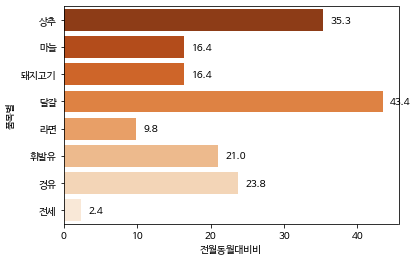

In [122]:
ax = sns.barplot(data=df_product, x='전월동월대비비', y='품목별', palette='Oranges_r')

for patch in ax.patches:  # ax.patches는 그래프 막대를 담고 있는 리스트
  x, y, width, height = patch.get_bbox().bounds # 막대의 정보(x,y,width,height)를 가져옴
  ax.text(x=width+1, y=y+0.5, s=f"{width:.1f}",)
  # x, y, width